Task-2:Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

Importing necessary libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [11]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data Exploration

In [12]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [53]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    int64  
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB


One-Hot Encoding for Gender

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

<Axes: xlabel='Gender', ylabel='count'>

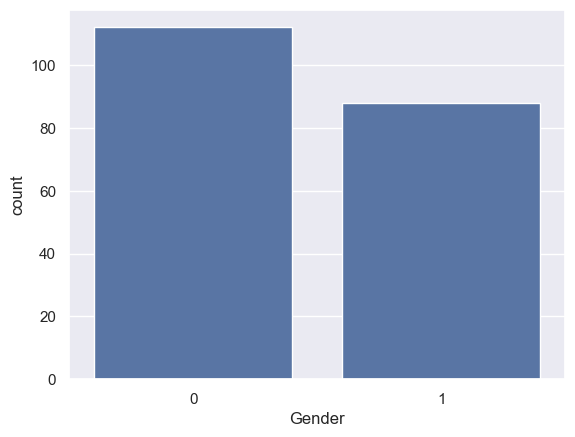

In [52]:
sns.countplot(df,x='Gender')

Standardizing Data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()
df[['Age','Annual Income (k$)','Spending Score (1-100)']]=scaler.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

Implemnting KMeans clustering

In [16]:
from sklearn.cluster import KMeans

In [38]:
wcss = []

for cluster in range(1,11):
    km=KMeans(n_clusters=cluster)
    km.fit(df)
    wcss.append(km.inertia_)
    

In [40]:
wcss

[667299.2799999999,
 167219.22007004044,
 74584.05830496579,
 42139.858220404756,
 27280.357782597646,
 19032.990934037887,
 14337.936985360793,
 11179.265162822192,
 8739.809493474444,
 7184.661605172712]

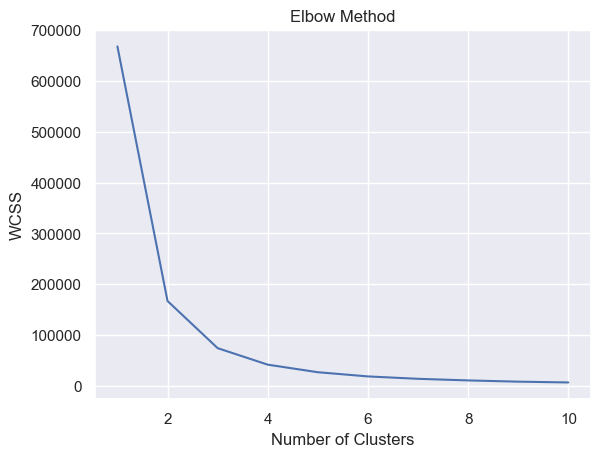

In [41]:
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [42]:
K=5
kmeans=KMeans(n_clusters=K,random_state=42)
kmeans.fit(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
labels=kmeans.predict(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

Visualization

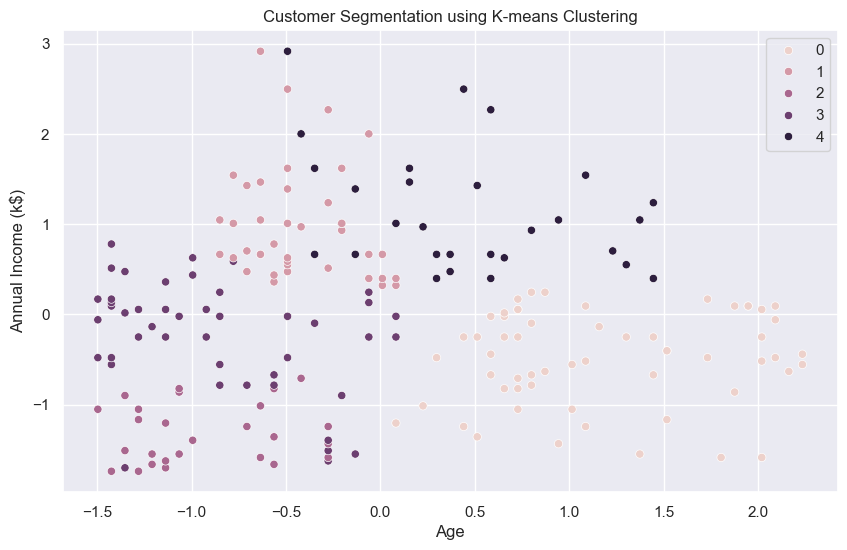

In [43]:
sns.set()
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue=labels, data=df)
plt.title('Customer Segmentation using K-means Clustering')
plt.show()

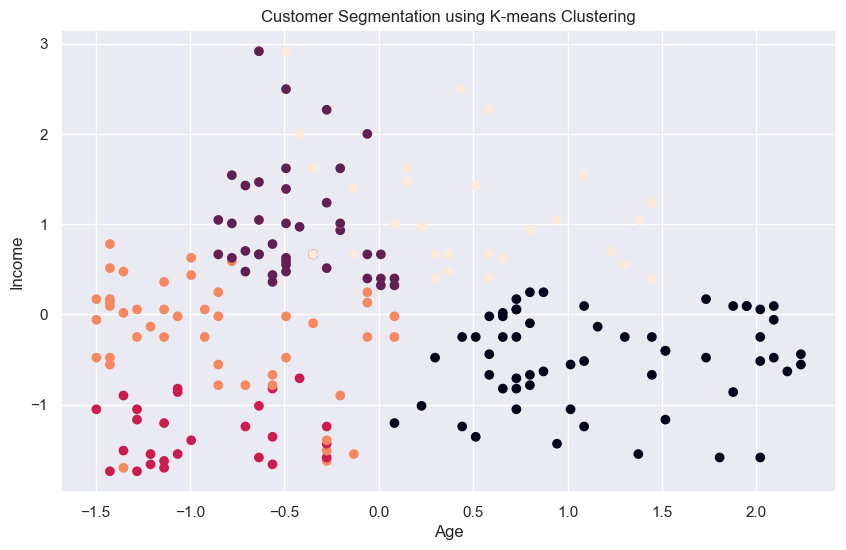

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=labels)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segmentation using K-means Clustering')
plt.show()

Text(0.5, 0.5, 'Income')

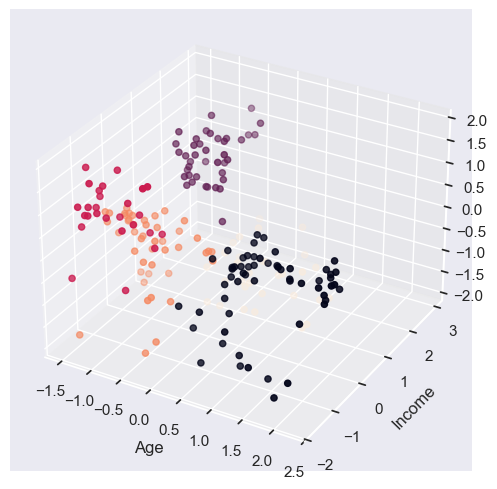

In [47]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels)
ax.set_xlabel('Age')
ax.set_ylabel('Income')